In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
from sklearn.preprocessing import normalize
%matplotlib inline

In [2]:
df = pd.read_csv('../input/bike-buyers/bike_buyers_clean.csv', sep=',')

In [3]:
df.head()

ID Marital Status  Gender  Income  Children        Education  \
0  12496        Married  Female   40000         1        Bachelors   
1  24107        Married    Male   30000         3  Partial College   
2  14177        Married    Male   80000         5  Partial College   
3  24381         Single    Male   70000         0        Bachelors   
4  25597         Single    Male   30000         0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region  Age  \
0  Skilled Manual        Yes     0        0-1 Miles   Europe   42   
1        Clerical        Yes     1        0-1 Miles   Europe   43   
2    Professional         No     2        2-5 Miles   Europe   60   
3    Professional        Yes     1       5-10 Miles  Pacific   41   
4        Clerical         No     0        0-1 Miles   Europe   36   

  Purchased Bike  
0             No  
1             No  
2             No  
3            Yes  
4            Yes

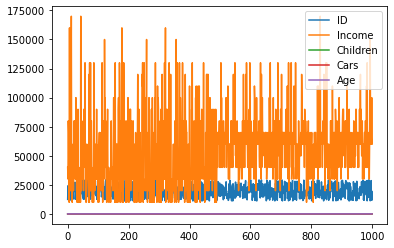

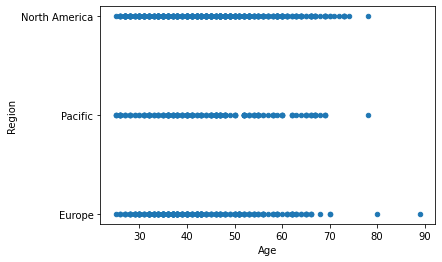

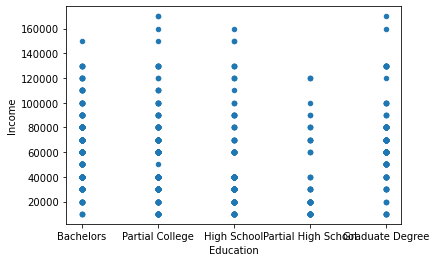

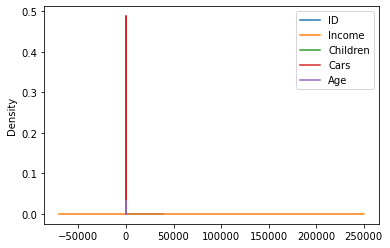

In [4]:
df.plot()
df.plot(kind='scatter',x='Age',y='Region')
df.plot(kind='scatter',x='Education',y='Income')
df.plot(kind='density')

In [5]:
df.shape

(1000, 13)

In [6]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


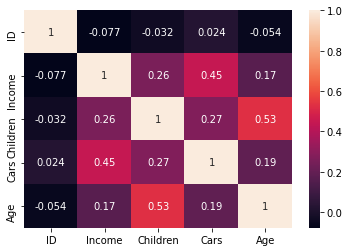

In [8]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Analyzing Numerical Variables

In [9]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables
The numerical variables are : ['ID', 'Income', 'Children', 'Cars', 'Age']


In [10]:
df[numerical].head()

ID  Income  Children  Cars  Age
0  12496   40000         1     0   42
1  24107   30000         3     1   43
2  14177   80000         5     2   60
3  24381   70000         0     1   41
4  25597   30000         0     0   36

In [11]:
# check missing values in numerical variables
df[numerical].isnull().sum()

ID          0
Income      0
Children    0
Cars        0
Age         0
dtype: int64

## Analyzing Categorical Variables

In [12]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 8 categorical variables
The categorical variables are : ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']


In [13]:
df[categorical].head()

Marital Status  Gender        Education      Occupation Home Owner  \
0        Married  Female        Bachelors  Skilled Manual        Yes   
1        Married    Male  Partial College        Clerical        Yes   
2        Married    Male  Partial College    Professional         No   
3         Single    Male        Bachelors    Professional        Yes   
4         Single    Male        Bachelors        Clerical         No   

  Commute Distance   Region Purchased Bike  
0        0-1 Miles   Europe             No  
1        0-1 Miles   Europe             No  
2        2-5 Miles   Europe             No  
3       5-10 Miles  Pacific            Yes  
4        0-1 Miles   Europe            Yes

In [14]:
df[categorical].isnull().sum()

Marital Status      0
Gender              0
Education           0
Occupation          0
Home Owner          0
Commute Distance    0
Region              0
Purchased Bike      0
dtype: int64

In [15]:
# view frequency counts of values in categorical variables
for var in categorical: 
    print(df[var].value_counts())
    print(df[var].value_counts()/np.float(len(df)))
    print()

Married    539
Single     461
Name: Marital Status, dtype: int64
Married    0.539
Single     0.461
Name: Marital Status, dtype: float64

Male      509
Female    491
Name: Gender, dtype: int64
Male      0.509
Female    0.491
Name: Gender, dtype: float64

Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: Education, dtype: int64
Bachelors              0.306
Partial College        0.265
High School            0.179
Graduate Degree        0.174
Partial High School    0.076
Name: Education, dtype: float64

Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: Occupation, dtype: int64
Professional      0.276
Skilled Manual    0.255
Clerical          0.177
Management        0.173
Manual            0.119
Name: Occupation, dtype: float64

Yes    685
No     315
Name: Home Owner, dtype: int64
Yes    0.685
No     0.315
Name: Home Owner, dtype: floa

In [16]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Marital Status  contains  2  labels
Gender  contains  2  labels
Education  contains  5  labels
Occupation  contains  5  labels
Home Owner  contains  2  labels
Commute Distance  contains  5  labels
Region  contains  3  labels
Purchased Bike  contains  2  labels


## Label Encoding

In [17]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Home Owner'] = label_encoder.fit_transform(df['Home Owner'])
df['Commute Distance'] = label_encoder.fit_transform(df['Commute Distance'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Purchased Bike'] = label_encoder.fit_transform(df['Purchased Bike'])
df.head()

ID  Marital Status  Gender  Income  Children  Education  Occupation  \
0  12496               0       0   40000         1          0           4   
1  24107               0       1   30000         3          3           0   
2  14177               0       1   80000         5          3           3   
3  24381               1       1   70000         0          0           3   
4  25597               1       1   30000         0          0           0   

   Home Owner  Cars  Commute Distance  Region  Age  Purchased Bike  
0           1     0                 0       0   42               0  
1           1     1                 0       0   43               0  
2           0     2                 3       0   60               0  
3           1     1                 4       2   41               1  
4           0     0                 0       0   36               1

## Categorize Continuous Data

In [18]:
df['Age'].describe()

count    1000.000000
mean       44.190000
std        11.353537
min        25.000000
25%        35.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: Age, dtype: float64

In [19]:
df['Age'] = pd.cut(x = df['Age'], bins = [0,30,40,50,60,100,150], labels = [0, 1, 2, 3, 4, 5])
df['Age'] = df['Age'].astype('int64') 
df['Age'].isnull().sum()

0

In [20]:
df['Income'].describe()

count      1000.000000
mean      56140.000000
std       31081.609779
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [21]:
df['Income'] = pd.cut(x = df['Income'], bins = [0, 30000, 50000, 75000, 100000, 150000, 200000], labels = [1, 2, 3, 4, 5, 6])
df['Income'] = df['Income'].astype('int64') 
df['Income'].isnull().sum()

0

In [22]:
df.dtypes

ID                  int64
Marital Status      int64
Gender              int64
Income              int64
Children            int64
Education           int64
Occupation          int64
Home Owner          int64
Cars                int64
Commute Distance    int64
Region              int64
Age                 int64
Purchased Bike      int64
dtype: object

In [23]:
df[:].isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [24]:
df.groupby('Purchased Bike').mean()

ID  Marital Status    Gender    Income  Children  \
Purchased Bike                                                               
0               19676.019268        0.408478  0.514451  2.499037  2.098266   
1               20278.873181        0.517672  0.503119  2.607069  1.702703   

                Education  Occupation  Home Owner      Cars  Commute Distance  \
Purchased Bike                                                                  
0                1.815029    2.246628    0.693642  1.670520          1.759152   
1                1.432432    2.272349    0.675676  1.216216          1.521830   

                  Region       Age  
Purchased Bike                      
0               0.859345  1.947977  
1               0.927235  1.731809

## Train-Test Split

In [25]:
X = df.drop(['Purchased Bike'], axis=1)
y = df['Purchased Bike']

In [26]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 999)
X_train.shape, X_test.shape

((500, 12), (500, 12))

In [27]:
X_train.head(100)

ID  Marital Status  Gender  Income  Children  Education  Occupation  \
314  18740               0       1       4         5          0           3   
941  21587               0       0       3         1          1           4   
992  22864               0       1       4         2          3           3   
515  16154               0       0       3         5          0           3   
31   22400               0       1       1         0          3           2   
..     ...             ...     ...     ...       ...        ...         ...   
758  21714               1       0       4         5          1           4   
542  11143               0       1       2         0          2           4   
663  11890               0       0       3         5          1           3   
846  13390               0       0       3         4          3           3   
825  24433               0       1       3         3          2           3   

     Home Owner  Cars  Commute Distance  Region  Age  
314           0     1                 0       2    2  
941           1     0                 3       1    1  
992           0     0                 4       1    2  
515           1     2                 3       1    2  
31            0     1                 0       2    0  
..          ...   ...               ...     ...  ...  
758           0     0                 0       1    2  
542           1     2                 4       1    0  
663           1     1                 0       1    2  
846           0     1                 1       1    3  
825           0     1                 1       1    3  

[100 rows x 12 columns]

In [28]:
X_train.tail()

ID  Marital Status  Gender  Income  Children  Education  Occupation  \
712  28026               0       0       2         2          2           3   
481  28564               1       0       2         2          3           0   
869  26065               1       0       5         3          0           1   
348  23915               0       1       1         2          2           2   
448  11383               0       0       1         3          1           0   

     Home Owner  Cars  Commute Distance  Region  Age  
712           0     2                 3       1    3  
481           1     0                 1       0    1  
869           0     4                 1       1    2  
348           1     2                 0       0    2  
448           1     0                 0       0    2

In [29]:
X_train.shape

(500, 12)

In [30]:
X_test.head()

ID  Marital Status  Gender  Income  Children  Education  Occupation  \
842  15555               0       0       3         1          3           4   
68   14813               1       0       1         4          2           2   
308  28758               0       1       2         2          3           0   
881  11275               0       0       4         4          1           1   
350  27878               1       1       1         0          3           2   

     Home Owner  Cars  Commute Distance  Region  Age  
842           1     1                 3       1    2  
68            1     1                 0       0    2  
308           1     1                 1       0    1  
881           1     2                 0       1    4  
350           0     0                 0       2    0

In [31]:
X_test.shape

(500, 12)

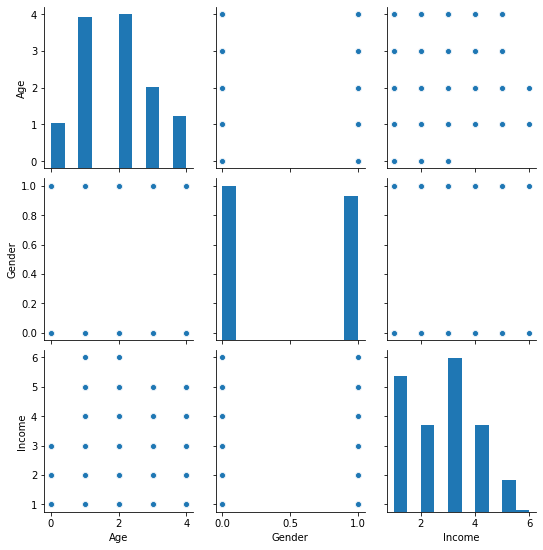

In [32]:
sns.pairplot(X_test[["Age","Gender","Income"]])

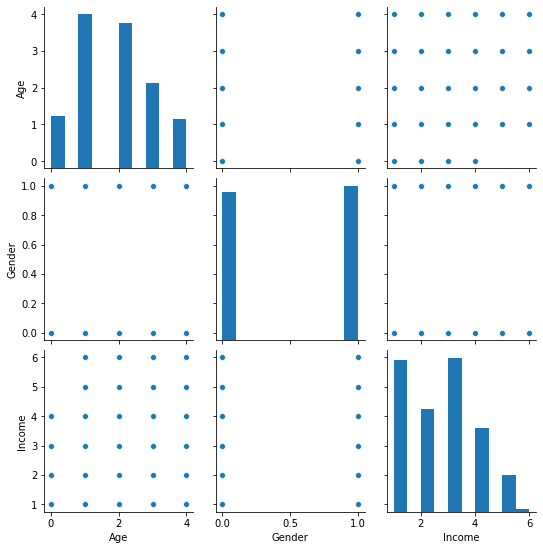

In [33]:
sns.pairplot(df[["Age","Gender","Income"]])

## Gausian Naive Bayes

In [34]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred = gnb.predict(X_test)

y_pred[:10]
len(y_pred)

500

In [36]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6400


In [37]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6680


In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[178  80]
 [100 142]]


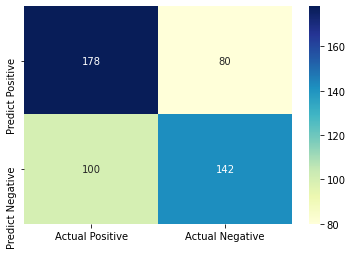

In [39]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       258
           1       0.64      0.59      0.61       242

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.64      0.64      0.64       500



## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
classifier = LogisticRegression(random_state = 999) 

In [42]:
df[:].isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [43]:
cols_to_be_normalized = ["Income","Children","Education","Occupation","Cars","Commute Distance","Region","Age"]
cols_not_to_be_normalized = ["Marital Status","Gender","Home Owner","Purchased Bike"]

normalized = normalize(df[cols_to_be_normalized])
boolean = df[cols_not_to_be_normalized]

In [44]:
df_normalized = pd.DataFrame(normalized,columns = cols_to_be_normalized)
df_boolean = pd.DataFrame(boolean,columns=cols_not_to_be_normalized)
# df_final = pd.concat([df_normalized,df_boolean],axis = 1)
# df_final = df_normalized.join(df_boolean)
df_final = df_normalized.merge(df_boolean,left_index=True, right_index=True)

In [45]:
A = df.drop(['Purchased Bike'], axis=1)
B = df['Purchased Bike']
#A = np.array(A)
#B = np.array(B)
A_train,A_test,B_train,B_test = train_test_split(A,B,random_state = 999,test_size =0.5)
classifier = LogisticRegression(random_state = 999) 
classifier.fit(A_train, B_train)
B_pred = classifier.predict(A_test)
classifier.fit(A_train, B_train)

LogisticRegression(random_state=999)

In [46]:
print(len(A_train))
print(len(A_test))

500
500


In [47]:
trainscore=classifier.score(A_train,B_train)
print(trainscore)
testscore=classifier.score(A_test,B_test)
print(testscore)

0.644
0.648


In [48]:
B_pred = classifier.predict(A_test)
print ("Accuracy : ", accuracy_score(B_test, B_pred))
print(classification_report(B_test, B_pred))

Accuracy :  0.648
              precision    recall  f1-score   support

           0       0.65      0.71      0.67       258
           1       0.65      0.59      0.62       242

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



In [49]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm = confusion_matrix(B_test, B_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[182  76]
 [100 142]]


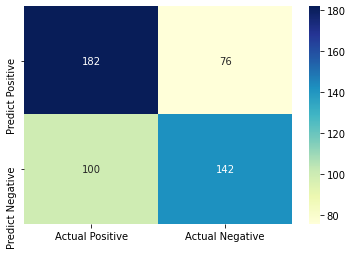

In [50]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [51]:
lgtpredict=classifier.predict(A_test)
metrics.roc_auc_score(y_test,lgtpredict,average='weighted')

0.6461016080466397

In [52]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(B_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(B_test, pred_prob2[:,1])
print(auc_score1)
print(auc_score2)

NameError: name 'pred_prob1' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

pred_prob1 = classifier.predict_proba(A_test)
pred_prob2 = gnb.predict_proba(A_test)
fpr, tpr, thresh = roc_curve(B_test, pred_prob1[:,1], pos_label=1)
fpr1, tpr1, thresh1 = roc_curve(B_test, pred_prob2[:,1], pos_label=1)

plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='red', label="Logistic Regression, AUC= "+str(auc_score1))
plt.plot(fpr1, tpr1, linestyle='--',color='black', label="Naive Bayes, AUC = "+str(auc_score2))
plt.plot([0,1],[0,1])
plt.title('ROC Curve Logistic vs Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positif Rate')
plt.legend(loc=4)
plt.show()

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=999)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred2 = clf.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

In [ ]:
y_pred_train2 = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train2)))

### Visualize Decision Tree

In [ ]:
from sklearn import tree

fn=['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']
cn=['Bought', 'Not Bought']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = fn, 
               class_names=cn, filled=True)

### Improving Accuracy using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
grid_values = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth':[4,5,6,7,8,9,10], 'min_samples_split': [2,3,4]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

In [ ]:
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))

#Confusion matrix
cm = confusion_matrix(y_test,y_pred_acc)
print(cm)

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train) 
result = model.score(X_test, y_test)

print('Model accuracy score: {0:0.4f}'. format(result))

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score

rfc = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Run the grid search
grid_obj = GridSearchCV(rfc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc = grid_obj.best_estimator_

# Fit the best algorithm to the data
rfc.fit(X_train, y_train)

In [ ]:
y_pred4 = grid_clf_acc.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## Final Note

In this kernel, I have analysed the Bike Buyers dataset and performed Binary Classification using various Supervised Learning Classification algorithms. The accuracy is fairly less due the the limitations of the dataset. Let me know how you found this kernel, Happy Kaggling :)